## Import libraries

In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import scipy
from scipy.spatial.distance import pdist, squareform
from pacBayesianDendogramCut import DendrogramCut
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
temp = scipy.io.loadmat('../../multilink/data/ticktoe.mat')
X = temp["X"].tolist()                                 # X = temp.X;
G = temp["G"]    

In [3]:
X = zip(X[0],X[1])
X = list(X)
X = list(map( lambda x: [x[0], x[1]]  ,X))
X = np.asarray(X)

In [4]:
X

array([[ 8.53040692e-04,  6.72882615e-03],
       [ 4.18348216e-03,  2.16395344e-02],
       [ 4.30914092e-02,  3.93053676e-02],
       [ 4.51551837e-02,  5.34461304e-02],
       [ 7.61613773e-02,  5.68689712e-02],
       [ 7.83964979e-02,  9.55074343e-02],
       [ 8.66001816e-02,  9.71160342e-02],
       [ 1.13795488e-01,  1.05388069e-01],
       [ 1.53073428e-01,  1.41465708e-01],
       [ 1.48527604e-01,  1.64678675e-01],
       [ 1.70909873e-01,  1.82194668e-01],
       [ 1.95152372e-01,  1.96845561e-01],
       [ 1.96947580e-01,  2.02790819e-01],
       [ 2.24328971e-01,  2.30851515e-01],
       [ 2.13745088e-01,  2.45474475e-01],
       [ 2.47018261e-01,  2.47791619e-01],
       [ 2.63320613e-01,  2.74797805e-01],
       [ 2.86390320e-01,  2.88959734e-01],
       [ 3.26342169e-01,  3.10180145e-01],
       [ 3.22527597e-01,  3.22537966e-01],
       [ 3.37656513e-01,  3.44737125e-01],
       [ 3.47239995e-01,  3.57140884e-01],
       [ 3.78732338e-01,  3.76877473e-01],
       [ 3.

## Generate dataset for clustering

In [5]:
centers = np.asarray([[-6.8, -7.3], [5, 2.5], [5, -2.5]])
samples = np.asarray([4, 1, 1]) * 50

'''X2, Z, C = sklearn.datasets.make_blobs(
    samples,
    cluster_std=[2, 1, 1],
    centers=centers,
    return_centers=True)'''
dist = pdist(X)
dist = squareform(dist)

## Plot the generated dataset

C:\Users\allem\AppData\Local\Temp/ipykernel_24056/1025274349.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


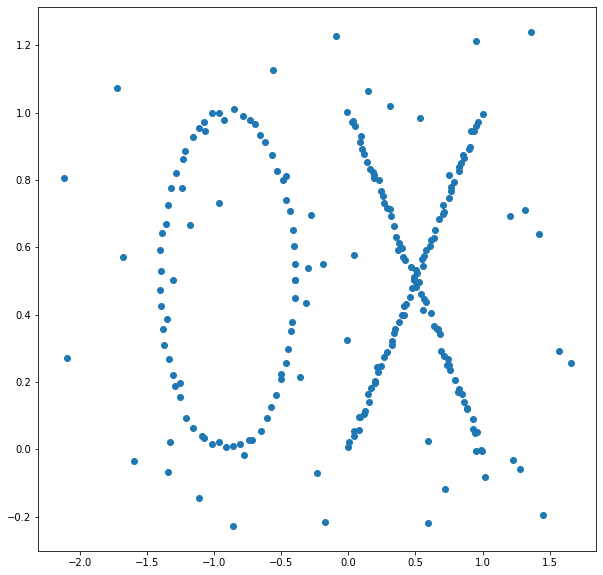

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1])
#ax.scatter(C[:, 0], C[:, 1])
fig.show()

## Compute the dynamic cut with the pacBayesian algorithm and plot the results

In [7]:
import pandas as pd

dist = pd.read_csv("../data/distance.csv", header=None)
dist = dist.replace(np.inf, 0).to_numpy()

In [8]:
model = DendrogramCut(k_max=230, method='average').fit(dist)
k = model.pac_bayesian_cut()
print(k)
model.dendrogram_plot(k=k)

[[0.00e+00 1.14e+02 1.00e-02 2.00e+00]
 [0.00e+00 4.30e+01 2.00e-02 2.00e+00]
 [0.00e+00 1.20e+02 2.00e-02 2.00e+00]
 [0.00e+00 1.99e+02 3.00e-02 2.00e+00]
 [0.00e+00 1.30e+01 4.00e-02 2.00e+00]
 [0.00e+00 5.10e+01 7.00e-02 2.00e+00]
 [0.00e+00 5.80e+01 9.00e-02 2.00e+00]
 [0.00e+00 7.00e+00 9.00e-02 2.00e+00]
 [0.00e+00 2.20e+01 9.00e-02 2.00e+00]
 [0.00e+00 6.30e+01 1.00e-01 2.00e+00]
 [0.00e+00 7.30e+01 1.20e-01 2.00e+00]
 [0.00e+00 7.60e+01 1.60e-01 2.00e+00]
 [0.00e+00 1.60e+01 1.70e-01 2.00e+00]
 [0.00e+00 2.37e+02 1.70e-01 3.00e+00]
 [0.00e+00 1.07e+02 1.80e-01 2.00e+00]
 [0.00e+00 2.38e+02 1.80e-01 3.00e+00]
 [0.00e+00 3.60e+01 1.90e-01 2.00e+00]
 [0.00e+00 2.44e+02 1.90e-01 4.00e+00]
 [0.00e+00 4.80e+01 2.00e-01 2.00e+00]
 [0.00e+00 2.42e+02 2.10e-01 3.00e+00]
 [0.00e+00 2.40e+01 2.10e-01 2.00e+00]
 [0.00e+00 6.80e+01 2.20e-01 2.00e+00]
 [0.00e+00 2.50e+02 2.20e-01 3.00e+00]
 [0.00e+00 2.46e+02 2.20e-01 3.00e+00]
 [0.00e+00 1.10e+01 2.20e-01 2.00e+00]
 [0.00e+00 2.56e+02 2.20e

c:\Users\allem\Desktop\IACV-Project\src\pacBayesianDendogramCut.py:81: RuntimeWarning: invalid value encountered in double_scalars
  self.mss_mat[i, 1] = self.linkage_stats[i]['tss'] / len(self.linkage_stats[i]['indices'])
c:\Users\allem\Desktop\IACV-Project\src\pacBayesianDendogramCut.py:108: RuntimeWarning: invalid value encountered in double_scalars
  total_mss += self.linkage_stats[cid]['tss'] / len(self.linkage_stats[cid]['indices'])


RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
from scipy.cluster.hierarchy import dendrogram


dendrogram(model.linkage)

In [ ]:
model.linkage